Matplotlib created a temporary config/cache directory at C:\Users\lee_0\AppData\Local\Temp\matplotlib-ib_77sme because the default path (C:\Users\lee_0\.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


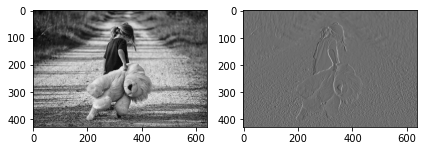

In [1]:
# 원본 이미지에 대한 convolution연산을 거쳐
# Feature Map을 추출한 뒤 그 결과를 확인해 보아요!

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as img

# 그림을 두개 그려야 해요!
# 왼쪽 그림은 원본 이미지를 출력할 꺼구요!
# 오른쪽 그림은 원본에서 특징을 추출한 feature map을 출력할 꺼예요!
fig = plt.figure()

img_ori = fig.add_subplot(1, 2, 1)
img_feature = fig.add_subplot(1, 2, 2)

origin_img = img.imread(r"C:\Users\lee_0\Desktop\코딩\ML\12.15\girl-teddy.jpg")
img_ori.imshow(origin_img)

# print(origin_img.shape)
# 원본 이미지의 shape => (429, 640, 3)

# 입력데이터는 4차원으로 표현되어야 해요!
# 우리가 이용하려는 API(Convolution연산을 수행하는 API)도
# 입력을 4차원으로 받아요!
# (이미지개수, height, width, color)
# (1, 429, 640, 3)
input_image = origin_img.reshape((1,) + origin_img.shape)
# print(input_image.shape)  # (1, 429, 640, 3)

# 픽셀값을 정수에서 실수로 변환해요!
input_image = input_image.astype(np.float32)

# 입력이미지의 형태(shape) => (1, 429, 640, 3)
# 입력이미지의 channel을 변경해서 입력이미지의 형태를
# (1, 429, 640, 3) 이 형태로 변환할 꺼예요!
channel_1_input_image = input_image[:, :, :, 0:1]
# print(channel_1_input_image.shape)  # (1, 429, 640, 1)

# filter를 준비해야 해요!
# (3, 3, 1, 1) => (filter의 heights, filter의 width, filter의 channel, filter의 개수)
filter = np.array([[[[-1]], [[0]], [[1]]],
                   [[[-1]], [[0]], [[1]]],
                   [[[-1]], [[0]], [[1]]]])
# print(filter.shape)  # (3, 3, 1, 1)

# strides => 1로 설정
# padding은 사용하지 않습니다.(VALID)

conv2d = tf.nn.conv2d(channel_1_input_image,
                      filter,
                      strides=[1, 1, 1, 1],
                      padding='VALID')

conv2d_result = conv2d.numpy()

# feature map의 shape을 알아보아요!
# print(conv2d_result.shape)  # (1, 427, 638, 1)

t_img = conv2d_result[0, :, :, :]

img_feature.imshow(t_img, cmap='gray')

plt.tight_layout()
plt.show()

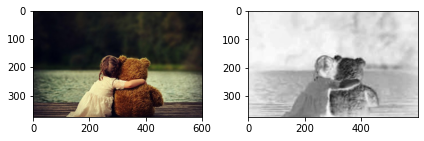

In [2]:
# 원본 이미지(컬러이미지)에 대한 convolution연산을 거쳐
# Feature Map을 추출한 뒤 그 결과를 확인해 보아요!

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as img

# 그림을 두개 그려야 해요!
# 왼쪽 그림은 원본 이미지를 출력할 꺼구요!
# 오른쪽 그림은 원본에서 특징을 추출한 feature map을 출력할 꺼예요!
fig = plt.figure()

img_ori = fig.add_subplot(1, 2, 1)
img_feature = fig.add_subplot(1, 2, 2)

origin_img = img.imread(r"C:\Users\lee_0\Desktop\코딩\ML\12.15\girl-teddy-color.jpg")
img_ori.imshow(origin_img)

# print(origin_img.shape)
# 원본 이미지의 shape => (376, 602, 3)

# 입력데이터는 4차원으로 표현되어야 해요!
# 우리가 이용하려는 API(Convolution연산을 수행하는 API)도
# 입력을 4차원으로 받아요!
# (이미지개수, height, width, color)
# (1, 376, 602, 3)
input_image = origin_img.reshape((1,) + origin_img.shape)
# print(input_image.shape)  # (1, 376, 602, 3)

# 픽셀값을 정수에서 실수로 변환해요!
input_image = input_image.astype(np.float32)

# filter를 준비해야 해요!
# (3, 3, 3, 1) => (filter의 height, filter의 width, filter의 channel, filter의 개수)
filter = np.array([[[[-1], [0], [1]], [[-1], [0], [1]], [[-1], [0], [1]]],
                   [[[-1], [0], [1]], [[-1], [0], [1]], [[-1], [0], [1]]],
                   [[[-1], [0], [1]], [[-1], [0], [1]], [[-1], [0], [1]]]])
# print(filter.shape)  # (3, 3, 3, 1)

# strides => 1로 설정
# padding은 사용하지 않습니다.(VALID)

conv2d = tf.nn.conv2d(input_image,
                      filter,
                      strides=[1, 1, 1, 1],
                      padding='VALID')

conv2d_result = conv2d.numpy()

# feature map의 shape을 알아보아요!
# print(conv2d_result.shape)  # (1, 374, 600, 1)

t_img = conv2d_result[0, :, :, :]

img_feature.imshow(t_img, cmap='gray')

plt.tight_layout()
plt.show()

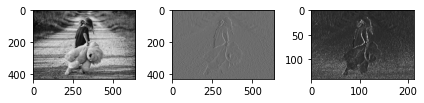

In [3]:
# 원본 이미지에 대한 convolution연산을 거쳐
# Feature Map을 추출한 뒤 그 결과를 확인해 보아요!
# 흑백이미지를 가지고 1 channel을 사용해서 convolution 연산과
# pooling 연산을 수행해 보아요!

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as img

# 그림을 세개 그려야 해요!
# 왼쪽 그림은 원본 이미지를 출력할 꺼구요!
# 가운데 그림은 원본에서 특징을 추출한 feature map을 출력할 꺼예요!
# 오른쪽 그림은 feature map에 poolin처리를 한 결과를 출력!
fig = plt.figure()

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

origin_img = img.imread(r"C:\Users\lee_0\Desktop\코딩\ML\12.15\girl-teddy.jpg")
ax1.imshow(origin_img)

# 입력데이터는 4차원으로 표현되어야 해요!
# 우리가 이용하려는 API(Convolution연산을 수행하는 API)도
# 입력을 4차원으로 받아요!
# (이미지개수, height, width, color)
# (1, 429, 640, 3)
input_image = origin_img.reshape((1,) + origin_img.shape)
# print(input_image.shape)  # (1, 429, 640, 3)

# 픽셀값을 정수에서 실수로 변환해요!
input_image = input_image.astype(np.float32)

# 입력이미지의 형태(shape) => (1, 429, 640, 3)
# 입력이미지의 channel을 변경해서 입력이미지의 형태를
# (1, 429, 640, 3) 이 형태로 변환할 꺼예요!
channel_1_input_image = input_image[:, :, :, 0:1]
# print(channel_1_input_image.shape)  # (1, 429, 640, 1)

# filter를 준비해야 해요!
# (3, 3, 1, 1) => (filter의 height, filter의 width, filter의 channel, filter의 개수)
filter = np.array([[[[-1]], [[0]], [[1]]],
                   [[[-1]], [[0]], [[1]]],
                   [[[-1]], [[0]], [[1]]]])
# print(filter.shape)  # (3, 3, 1, 1)

# strides => 1로 설정
# padding은 사용하지 않습니다.(VALID)

conv2d = tf.nn.conv2d(channel_1_input_image,
                      filter,
                      strides=[1, 1, 1, 1],
                      padding='VALID')

conv2d_result = conv2d.numpy()

# feature map의 shape을 알아보아요!
# print(conv2d_result.shape)  # (1, 427, 638, 1)

t_img = conv2d_result[0, :, :, :]

ax2.imshow(t_img, cmap='gray')

# 이번에는 추가적으로 pooling처리를 더 해 보아요!
# pooling은 kernel의 크기만 우리가 설정하면 되요!
# 자동적으로 strides는 kernel 크기에 따라 설정되요! 3x3
# 사용하는 kernel 크기는 3x3으로 할꺼예요!

pool = tf.nn.max_pool(conv2d_result,
                      ksize=[1, 3, 3, 1],
                      strides=[1, 3, 3, 1],
                      padding='VALID')

pool_result = pool.numpy()

p_img = pool_result[0, :, :, :]

ax3.imshow(p_img, cmap='gray')

plt.tight_layout()
plt.show()

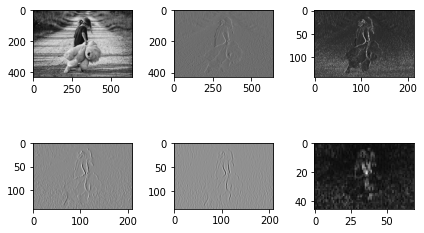

In [4]:
# 위의 그림은 원본이미지를 가지고
# convolution 1번, pooling 1번을 수행한 결과를 출력한 그림이예요!

# pooling한 결과에 convolution을 연속으로 2번 수행하고
# 마지막으로 pooling을 1번 더 수행해서 그 결과를 그림으로 출력해보세요!
# 직접 구현해 보아요!

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as img

fig = plt.figure()

ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4)
ax5 = fig.add_subplot(2, 3, 5)
ax6 = fig.add_subplot(2, 3, 6)

origin_img = img.imread(r"C:\Users\lee_0\Desktop\코딩\ML\12.15\girl-teddy.jpg")
ax1.imshow(origin_img)

# 입력데이터는 4차원으로 표현되어야 해요!
# 우리가 이용하려는 API(Convolution연산을 수행하는 API)도
# 입력을 4차원으로 받아요!
# (이미지개수, height, width, color)
# (1, 429, 640, 3)
input_image = origin_img.reshape((1,) + origin_img.shape)
# print(input_image.shape)  # (1, 429, 640, 3)

# 픽셀값을 정수에서 실수로 변환해요!
input_image = input_image.astype(np.float32)

# 입력이미지의 형태(shape) => (1, 429, 640, 3)
# 입력이미지의 channel을 변경해서 입력이미지의 형태를
# (1, 429, 640, 3) 이 형태로 변환할 꺼예요!
channel_1_input_image = input_image[:, :, :, 0:1]
# print(channel_1_input_image.shape)  # (1, 429, 640, 1)

# filter를 준비해야 해요!
# (3, 3, 1, 1) => (filter의 height, filter의 width, filter의 channel, filter의 개수)
filter = np.array([[[[-1]], [[0]], [[1]]],
                   [[[-1]], [[0]], [[1]]],
                   [[[-1]], [[0]], [[1]]]])
# print(filter.shape)  # (3, 3, 1, 1)

# strides => 1로 설정
# padding은 사용하지 않습니다.(VALID)

conv2d = tf.nn.conv2d(channel_1_input_image,
                      filter,
                      strides=[1, 1, 1, 1],
                      padding='VALID')

conv2d_result = conv2d.numpy()

# feature map의 shape을 알아보아요!
# print(conv2d_result.shape)  # (1, 427, 638, 1)

t_img = conv2d_result[0, :, :, :]

ax2.imshow(t_img, cmap='gray')

# 이번에는 추가적으로 pooling 처리를 더 해 보아요!
# pooling은 kernel의 크기만 우리가 설정하면 되요!
# 자동적으로 stirdes는 kernel 크기에 따라 설정되요! 3x3
# 사용하는 kernel 크기는 3x3으로 할꺼예요!

pool = tf.nn.max_pool(conv2d_result,
                      ksize=[1, 3, 3, 1],
                      strides=[1, 3, 3, 1],
                      padding='VALID')

pool_result = pool.numpy()

p_img = pool_result[0, :, :, :]

ax3.imshow(p_img, cmap='gray')

####
conv2d = tf.nn.conv2d(pool_result,
                      filter,
                      strides=[1, 1, 1, 1],
                      padding='VALID')

conv2d_result = conv2d.numpy()
t_img = conv2d_result[0, :, :, :]
ax4.imshow(t_img, cmap='gray')

conv2d = tf.nn.conv2d(conv2d_result,
                      filter,
                      strides=[1, 1, 1, 1],
                      padding='VALID')

conv2d_result = conv2d.numpy()
t_img = conv2d_result[0, :, :, :]
ax5.imshow(t_img, cmap='gray')

pool = tf.nn.max_pool(conv2d_result,
                      ksize=[1, 3, 3, 1],
                      strides=[1, 3, 3, 1],
                      padding='VALID')

pool_result = pool.numpy()

p_img = pool_result[0, :, :, :]

ax6.imshow(p_img, cmap='gray')

plt.tight_layout()
plt.show()

In [5]:
# MNIST 데이터를 이용해서
# CNN 구현을 해 보아요!

# 필요한 module import
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [6]:
# Raw Data Loading
df = pd.read_csv(r"C:\Users\lee_0\Desktop\코딩\ML\12.07\train.csv")
# 이렇게 얻어온 데이터는 당연히 2차원 데이터예요!

# 결측치 없고, 이상치 없어요!
# feature enginerring도 할게 없어요!

# 독립변수와 종속변수를 분리!
x_data = df.drop('label', axis=1, inplace=False).values
t_data = df['label'].values

# 정규화
scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# Data Split
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm,
                 t_data,
                 test_size=0.3,
                 stratify=t_data,
                 random_state=0)

In [7]:
# 예전 일반적인 MNIST 구현할때 input layer의 input_shape
# input_shape=(784,)

# CNN 모델을 만들면 되요!

model = Sequential()

model.add(Conv2D(filters=32,
                 kernel_size=(3, 3),
                 strides=(1, 1),
                 activation='relu',
                 input_shape=(28, 28, 1)))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 strides=(1, 1),
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128,
                 kernel_size=(3, 3),
                 strides=(1, 1),
                 activation='relu'))

## 그 다음은 학습에 관련되 DNN이 나오면 되요!

model.add(Flatten())  # 데이터를 1차원으로 평평하게 피세요!

# Hidden layer
model.add(Dense(units=256,
                activation='relu'))

model.add(Dense(units=10,
                activation='softmax'))

model.compile(optimizer=Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [8]:
history = model.fit(x_data_train_norm.reshape(-1, 28, 28, 1),
                    t_data_train,
                    epochs=100,
                    batch_size=100,
                    validation_split=0.3,
                    verbose=1)

Epoch 1/100
206/206 [==============================] - 11s 50ms/step - loss: 0.3456 - acc: 0.8942 - val_loss: 0.1465 - val_acc: 0.9545
Epoch 2/100
206/206 [==============================] - 11s 51ms/step - loss: 0.0796 - acc: 0.9750 - val_loss: 0.0674 - val_acc: 0.9787
Epoch 3/100
206/206 [==============================] - 10s 50ms/step - loss: 0.0512 - acc: 0.9836 - val_loss: 0.0554 - val_acc: 0.9822
Epoch 4/100
206/206 [==============================] - 14s 70ms/step - loss: 0.0380 - acc: 0.9877 - val_loss: 0.0434 - val_acc: 0.9859
Epoch 5/100
206/206 [==============================] - 5s 24ms/step - loss: 0.0312 - acc: 0.9905 - val_loss: 0.0445 - val_acc: 0.9862
Epoch 6/100
206/206 [==============================] - 5s 23ms/step - loss: 0.0202 - acc: 0.9935 - val_loss: 0.0425 - val_acc: 0.9866
Epoch 7/100
206/206 [==============================] - 5s 23ms/step - loss: 0.0187 - acc: 0.9940 - val_loss: 0.0428 - val_acc: 0.9879
Epoch 8/100
206/206 [==============================] - 5s 

394/394 [==============================] - 1s 3ms/step - loss: 0.1200 - acc: 0.9888
[0.11999714374542236, 0.9888095259666443]


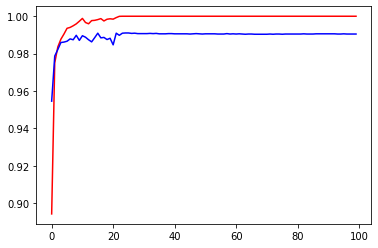

In [9]:
# Evaluation

print(model.evaluate(x_data_test_norm.reshape(-1, 28, 28, 1),
                     t_data_test))

# 시각화
import matplotlib.pyplot as plt

plt.plot(history.history['acc'], color='r')
plt.plot(history.history['val_acc'], color='b')
plt.show()